![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fhackathon&branch=master&subPath=ColonizingMars/ChallengeTemplates/challenge-option-2-how-could-we-colonize-mars.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

# Data Scientist Challenge: Humanity must build a new home on Mars.


You’re a data scientist on a team of newly-arrived humans. While you were on Earth, you figured out how you could make the planet habitable. From growing food to clothing needs, you need to start building the framework for sustaining life on the red planet. 

In this notebook, we have decided to focus on music as a form of entertainment for people on Mars. We do not want to be bored on Mars !

### Section I: About You

We believe that arts shape the structures, behaviour and values of society. Music in particular, is one of the most powerful media to communicate messages to billions of people. 

The questions we picked: Will it be boring on Mars ? Can music be used for entertainment on Mars ? Can music be used for purposes other than entertainment on Mars ? Can music make people happy on Mars ? 

### Section II: The data you used

This Spotify Dataset has 160k+ songs - released in between 2000 and 2020 available as a data frame/table. Each row represents a single track and each column represents a field of the track.

Spotify is a Swedish audio streaming platform that provides DRM-protected music and podcasts from record labels and media companies. At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year.

Below are some of the fields available for each track which we will use to answer the questions we are interested in:\

**Beats Per Minute (BPM)** — The tempo of the song.\
**Energy** — The energy of a song, the higher the value, the more energetic.\
**Danceability** — The higher the value, the easier it is to dance to this song.\
**Loudness** — The higher the value, the louder the song (in dB).\
**Valence** — The higher the value, the more positive mood for the song.\
**Length** — The duration of the song.\
**Acousticness** — The higher the value the more acoustic the song is.\
**Release Year** — The year each song was released.\
**Popularity** — The higher the value the more popular the song is.\

In [76]:
# importing libraries
import pandas as pd
import plotly_express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# reading the data 
# we have csv file stored in the cloud
# url = "https://swift-yeg.cloud.cybera.ca:8080/v1/AUTH_d22d1e3f28be45209ba8f660295c84cf/hackaton/top_tracks.csv"
url = '/Users/alyaamohamed/Downloads/spotify_data_2000_2020.csv'

# read csv file from url and save it as dataframe
music = pd.read_csv(url, index_col=0)

In [90]:
# print first 5 rows
music.head()

,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
acousticness,,,,,,,,,,,,,,,,,,
0.97200,['David Bauer'],0.567,313293,0.227,0,0w0D8H1ubRerCXHWYJkinO,0.601000,10,0.110,-13.441,1,Shout to the Lord,47,2000,0.0290,136.123,0.0396,2000
0.32100,['Etta James'],0.821,360240,0.418,0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9,0.222,-9.841,0,Miss You,51,2000-12-12,0.0407,117.382,0.8030,2000
0.00659,['Quasimoto'],0.706,202507,0.602,1,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11,0.400,-8.306,0,Real Eyes,44,2000-06-13,0.3420,89.692,0.4790,2000
0.00390,['Millencolin'],0.368,173360,0.977,0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11,0.350,-2.757,0,Penguins & Polarbears,52,2000-02-22,0.1270,165.889,0.5480,2000
0.12200,['Steve Chou'],0.501,344200,0.511,0,4mronxcllhfyhBRqyZi8kU,0.000000,7,0.279,-9.836,0,黃昏,53,2000-12-25,0.0291,78.045,0.1130,2000


In [91]:
# how many rows and colums does the dataframe have?
music.shape

(41656, 18)

### Section III: Data Analysis and Visualization

We want to investigate how much time of songs are available on Spotify ? what is the average duration of a song ? what is the longest and shortest song ? 

In [92]:
# print column names
music.columns

Index(['artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [93]:
# arrange songs by duration
music.sort_values(by='duration_ms',ascending=False)

,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
acousticness,,,,,,,,,,,,,,,,,,
0.111000,['Sound Dreamer'],0.0000,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392000,2,0.1370,-21.669,1,Brown Noise - 90 Minutes,50,2013-06-05,0.0000,0.000,0.000000,2013
0.975000,['Sounds for Life'],0.1530,4270034,0.079200,0,605JTCltCe1IcqrGXQ294K,1.000000,10,0.1130,-23.962,0,Brown Noise for Sleep,42,2009-03-15,0.1250,132.904,0.000537,2009
0.000385,"['Lightning, Thunder and Rain Storm']",0.1160,4269407,0.338000,0,7dYf0CsWHDLvlP6HJPs3zO,0.093500,1,0.3420,-36.638,1,Midnight Thunderstorm Part 2,44,2009-09-22,0.0648,94.453,0.029300,2009
0.932000,['Ocean Waves For Sleep'],0.0797,4120258,0.995000,0,1saXdvEAafdRzUphXBzSHg,0.562000,1,0.3100,-17.379,1,Ocean Waves for Sleep,55,2010-07-16,0.0612,84.788,0.000010,2010
0.932000,['Ocean Sounds'],0.0797,4120258,0.995000,0,2QfFLpSGF1T1pY6tq4kD7Z,0.562000,1,0.3100,-17.379,1,Ocean Waves Sounds,44,2010-07-16,0.0612,84.788,0.000010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.253000,['Kanye West'],0.7310,31360,0.412000,1,466XcSgGAiQxcDrcV0yoMP,0.000000,11,0.1640,-11.590,0,Skit #2,44,2005-09-30,0.9460,66.512,0.950000,2005
0.000000,['Bass Mekanik'],0.1330,31000,0.000000,0,6v2oyTikD4c9X5C3IMdKy2,0.000000,10,0.0000,-39.753,1,65 Hz Test Tone,42,2000-03-01,0.0000,140.044,0.000000,2000
0.098800,['Thomas & Friends'],0.9060,30946,0.596000,0,2mQVahe9gsumDmr67neUzb,0.000059,8,0.0561,-10.254,1,Thomas Theme (Reprise),52,2001-01-01,0.0463,98.980,0.811000,2001


In [103]:
# let's look at the duration of songs

# longest song
print("Maximum duration song - " , np.max(music.duration_ms)/(1000*60), "minutes")

# shortest song
print("Minimum duration song - " , np.min(music.duration_ms)/(1000*60) , "minutes")

# average duration in minutes of a song 
print("Average song duration : ", np.mean(music.duration_ms)/(1000*60) , "minutes")

# total duration of songs in days 
print("Total duration of songs on spotify since year 2000:" , np.sum(music.duration_ms)/(1000*60*60*24), "days")


Maximum duration song -  90.05833333333334 minutes
Minimum duration song -  0.5050166666666667 minutes
Average song duration :  3.852151914090007 minutes
Total duration of songs on spotify since year 2000: 111.43419453703704 days


#### Observations
We have around 111 days of songs to keep people entertained on Mars. 

Text(0.5, 0, 'Year')

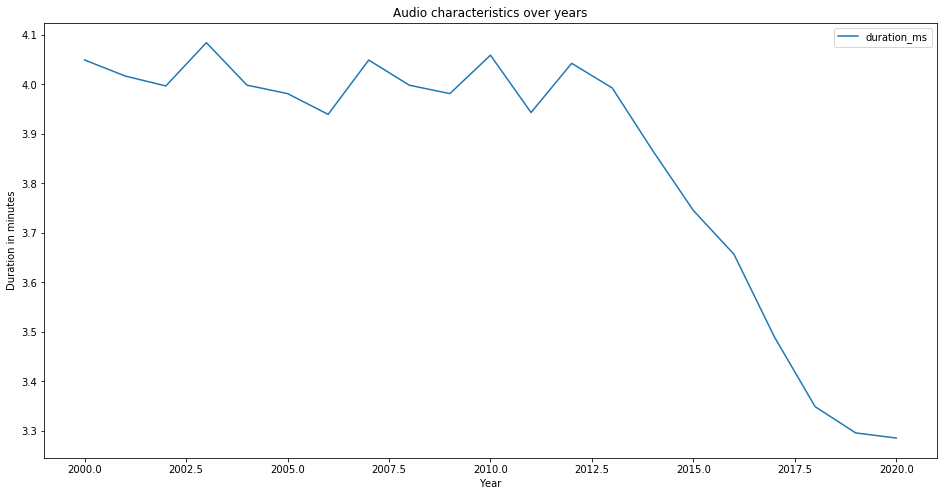

In [118]:
# Are more recent songs longer or shorter in duration  ? 
plt.figure(figsize=(16,8))
columns = ["duration_ms"]
for col in columns:
    x = music.groupby("year")[col].mean()
    x = x/(1000*60)
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over years')
ax.set_ylabel('Duration in minutes')
ax.set_xlabel('Year')

#### Observations
More recent songs tend to be shorter than older ones. 

### Section IV: Conclusion

We have used data to know that we can have songs worth 111 days to keep people entertained with music on Mars with the more recent songs being shorted in time compared to the older ones. 

### What's next !

Several other questions can be answered with this dataset like are longer songs more popular than shorter ones ? can we group songs by their vibes (using valence, danceability) ? 

In this example you have seen how data can give us insights into questions and solutions that are both data-driven. Now go to the hackathon template and start solving your own challenge for sustaining life on Mars !

### [![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)